<a href="https://colab.research.google.com/github/TaylorL74/projects/blob/main/Cardiovascular_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Data Project



---



## The Problem



---



For this project I will be exploring the risk factors that contribute to poor cardiovascular health.

I will be using a dataset whih contains patient data relating to a number of known risk factors and markers for poor cardiovascuar health, such as blood pressure, physical acitivty level, substance use such as smoking or alcohol, and cholesterol and blood glucose levels.

A few questions I would like to answer in this project are:
* Which factor (smoking, alcohol, cholesterol, glucose, BMI, blood pressure) is most associated with poor cardiovascular health?
* How do measures of health such as cardiovascular performance, blood glucose and cholesterol levels differ between men and women, and between different age groups?
* How representative is this data likely to be?

These questions are important because of how prevelant cardiovascular diseases are a common cause of disability and death in many counties. [According to the WHO](https://data.who.int/countries/826), in the UK in 2021 Ischaemic Heart Disease was the third most common cause of death overall, and the most common cause for men. Additionally, all conditions in the top 5 causes of death are known to be caused or worsened by poor cardiovascular health. Knowing the risk factors and warning signs for cardiovascular conditions means we can more effectively target prevention measures, and diagnose problems quicker for more effective treatment.

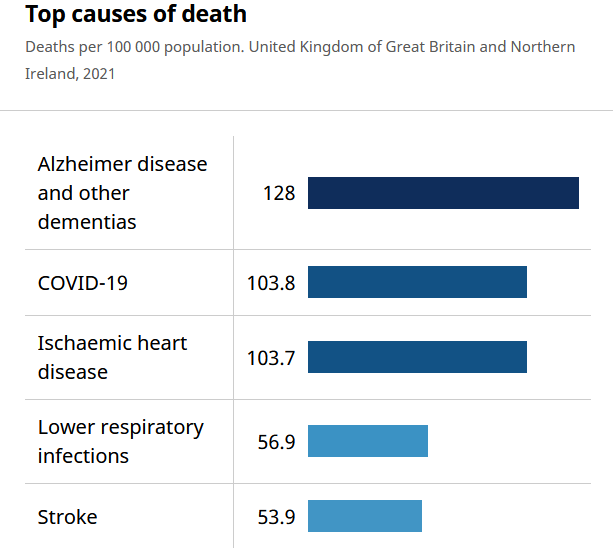

### About the Data


[Medical Data Dataset](https://drive.google.com/uc?id=1wsZNoNqJ4OPpSqhCEsjRm5BLyG8EDfWW)

[Associated Documentation](https://docs.google.com/document/d/1JE5HJiM3skX4G4_txYus6Ng8NQqcxdGpAyvHOIQJIWM/edit?tab=t.0)

The dataset I will be using has started out with 13 columns, explained below:

* PatientID (Numbered 0-99,999)
* Age (in days)
* Sex (1 = female, 2 = male)
* Height (cm)
* Weight (kg)
* Ap_hi (mmHg, systolic blood pressure)
* Ap_lo (mmHg, diastolic blood pressure)
* Cholesterol (normalised to 0=normal, 1 and above = high)
* Glucose (normalised to 0=normal, 1 and above = high)
* Smoke (0=non-smoker, 1=smoker)
* Alcohol (0=moderate consumption, 1=high consumption)
* Active (0=active, 1=inactive)
* Cardio (cardiovascular health 0=good, 1=poor)


# Clean and transform
---

### Age in years column
I opened the dataset in Excel in order to examine and clean the data.

The first step I took was to create a column with the patient age in years, as this would be easier to understand at a glance than the age in days.

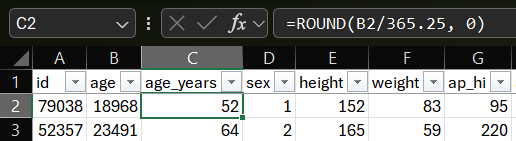

I then used a formula to check what the max and min ages were of patients in the dataset, and discovered that the dataset contained information about patients between **30 and 65**.

### Erroneous and extreme values
After this I wanted to check that the numbers in the height, weight and blood pressure columns were within what would be expected ranges.

As the output below shows,  most columns contained values that seemed implausible. Given that the minimum age of patients in the dataset was 3, it seems very unlikely that a patient would only be 55cm tall, or weight only 10kg, and there were negative and extreme values in the blood pressure columns.

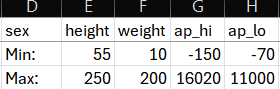

For the **height** column, I decided to remove 52 values below 120cm, as these values are highly unlikely for adults. It is possible that these entries were incorrectly recorded in inches rather than centimeters, or that a digit may have been missed when the data was entered. However, without knowing the exact nature of these errors, I chose to remove the rows rather than attempt to correct them. Additionally, I removed a single entry where the height was recorded as 250cm, as this exceeds the reasonable height range for an adult, equivalent to over 8 feet tall.

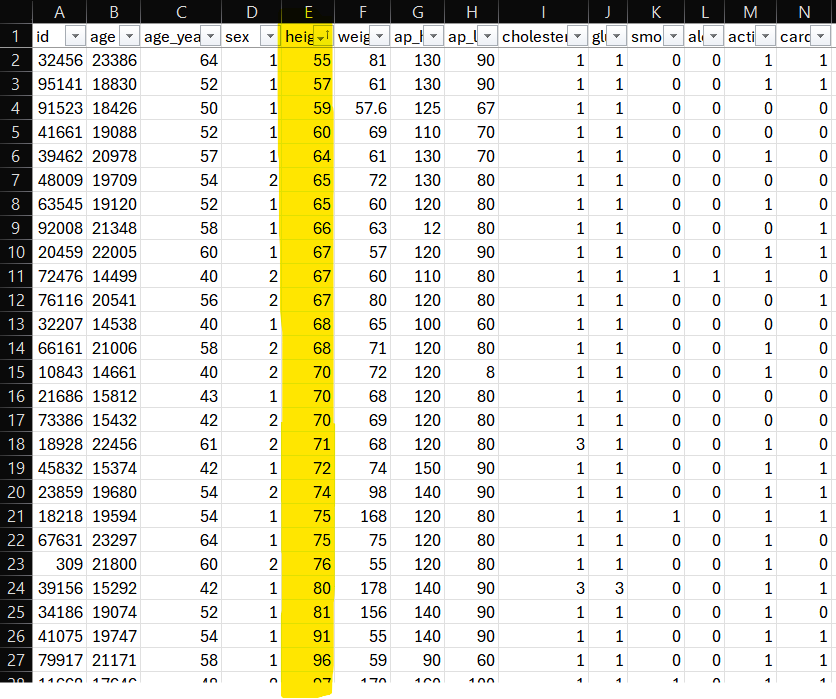

For **weight**, the upper value does not seem to be erroneous. However, the lower value of 10kg is highly unlikely for a 30+ year-old adult, especially considering that any potential outliers for height have already been addressed. To ensure the data remained realistic, I decided to remove 20 entries with weights lower than 35kg, as this is the lowest weight typically seen in adult BMI charts. This cut-off was chosen to exclude values that fall outside of a reasonable range for adults, to try and ensure that the dataset includes as few erroneous values as possible.

For the two **blood pressure** columns, I removed any rows containing negative values, as blood pressure readings cannot be negative. While it is possible that these values were entered incorrectly, I opted to delete the rows rather than convert them to positive values, as doing so could lead to inaccurate or misleading analysis.

For ap_hi (systolic blood pressure), I excluded 233 values that fell outside the range of 50-230 mmHg, and for ap_lo (diastolic blood pressure), I removed 1,061 values outside the range of 35-135 mmHg. I selected these limits based on commonly accepted medical guidelines and blood pressure charts, which offer the widest plausible ranges for healthy and abnormal blood pressure readings. I chose these cut-offs to ensure that the data remained consistent with real-world values while minimizing the potential impact of outliers or erroneous entries.

Additionally, there were several rows where the ap_hi value was lower than that of the ap_lo value. These rows were also removed, after being identified using conditional formatting (using the formula below), as these are also not possible values for blood pressure readings.

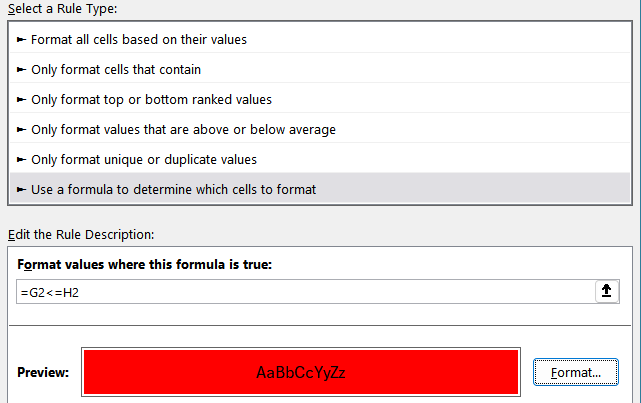

### Additional Formatting and Data Validation

Next I ensured that all cells in the height, weight and blood pressure column were **formatted as numbers** with no decimal places to ensure consistency.

I checked for **blank cells** using the Find & Select > Go To Special function, and removed  3 rows with blank cells in the Smoker column.

I also checked the Sex, Cholesterol, Glucose, Smoker, Alcohol, Activity and Cardiovascular columns, which should all have 1 of 2 or 3 permitted values in each cell, to ensure there were no erroneous values. I used **Data Validation**, setting a list of allowed values, and then selected for any invalid data to be circled, however **no invalid data was found**.

Below is an example of the Data Validation I set up for the 4 columns which were restricted to 0 or 1 as an entry.

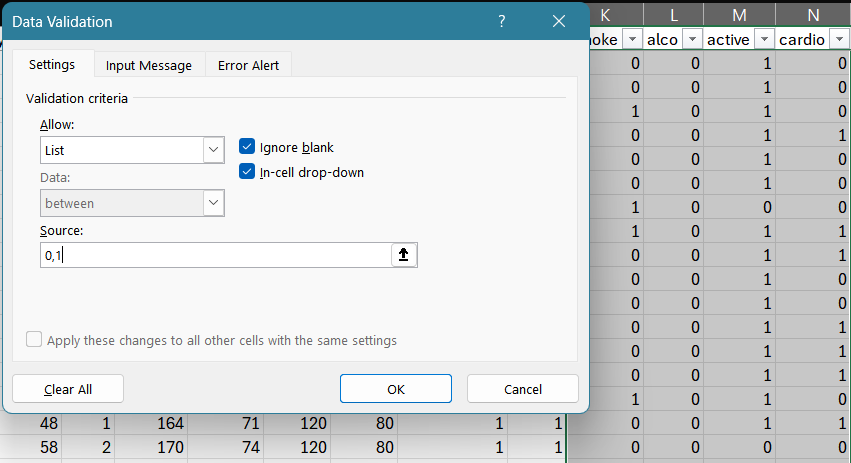

I saved the excel file in google drive and read the file into this worksheet below.

In [ ]:
# Bringing the cleaned data into Python
import pandas as pd
from google.colab import drive

# Mount Drive in order to access file location
def mount_drive():
  drive.mount("/content/drive", force_remount=True)
  folderpath = "/content/drive/My Drive/MedicalProject"
  return folderpath

# Load data from CSV file stored in Google Drive
def get_data(path):
  try:
    df = pd.read_csv(path + "/medical-data.csv")
    return df
  except:
    print("There was a problem and the file could not be opened.")

# Read the data from the file into the variable df, then display the data. The data in df will be available in cells further down
path = mount_drive()
df = get_data(path)

Mounted at /content/drive


I before I begin further analysis, I would like to create a BMI column out of the height and weight data. The formula for BMI is:

BMI = Weight(Kg) / Height($m^2$)


In [ ]:
# Function to create a new bmi column with the bmi value for each patient
def create_bmi():
  # Creating a new column with each patients height in meters
  df["height_m"] = df["height"] / 100
  # Converting that column to hold the square value of the height in mmeters
  df["height_m"] = df["height_m"] ** 2
  # Creating a new column to be populated using the formula for bmi
  df["bmi"] = df["weight"] / df["height_m"]
  # Rounding to one decimal place
  df["bmi"] = df["bmi"].round(1)

  return df

df = create_bmi()

# Drop the height in meters column that was created as it is no longer necessary
def remove_height_m(df):
  df = df.drop(columns=["height_m"], axis=1)
  return df

df = remove_height_m(df)
display(df)

,id,age,age_years,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,50,2,168,62,110,80,1,1,0,0,1,0,22.0
1,1,20228,55,1,156,85,140,90,3,1,0,0,1,1,34.9
2,2,18857,52,1,165,64,130,70,3,1,0,0,0,1,23.5
3,3,17623,48,2,169,82,150,100,1,1,0,0,1,1,28.7
4,4,17474,48,1,156,56,100,60,1,1,0,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68560,99993,19240,53,2,168,76,120,80,1,1,1,0,1,0,26.9
68561,99995,22601,62,1,158,126,140,90,2,2,0,0,1,1,50.5
68562,99996,19066,52,2,183,105,180,90,3,1,0,1,0,1,31.4
68563,99998,22431,61,1,163,72,135,80,1,2,0,0,0,1,27.1


## Analyse


---



### Summary Statistics
Now that the data has been cleaned and transformed, we can use python to explore and analyse the data. I started by displaying the summary statistics for the full dataframe.

In [ ]:
def summary():
  display(df.describe())
  print("\n"+"-"*40)

summary()

,id,age,age_years,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,68565.000000,68565.000000,68565.000000,68565.000000,68565.000000,68565.000000,68565.000000,68565.000000,68565.000000,68565.000000,68565.000000,68565.000000,68565.000000,68565.000000,68565.000000
mean,49974.819952,19464.285977,53.290848,1.348589,164.416087,74.119974,126.644527,81.286225,1.364647,1.225786,0.087931,0.053336,0.803238,0.494596,27.457678
std,28846.826700,2468.159606,6.762655,0.476527,7.909064,14.284541,16.610488,9.371741,0.678896,0.571676,0.283197,0.224705,0.397554,0.499974,5.255532
min,0.000000,10798.000000,30.000000,1.000000,120.000000,35.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.300000
25%,24998.000000,17657.000000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.900000
50%,50013.000000,19701.000000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.300000
75%,74874.000000,21324.000000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.100000
max,99999.000000,23713.000000,65.000000,2.000000,207.000000,200.000000,230.000000,130.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,108.200000



----------------------------------------


### Analysis of Factors Relating to Cardiovascular Health
I then split the dataframe into two based on the cardio score, to see if any of the summary statistics were significantly different based on cardiovascular health.

In [ ]:
# Creating seperate dataframes for those with bad and good cardiovascular health
def bad_cardio_df():
  bad_cardio_df = df[df["cardio"] == 1]
  return bad_cardio_df

bad_cardio_df = bad_cardio_df()
print("Statistics for those with poor cardiovascular health")
# Describing the new dataframes, with only select columns shown to make things easier to read and less busy
display(bad_cardio_df[["age_years", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active", "bmi"]].describe())

def good_cardio_df():
  good_cardio_df = df[df["cardio"] == 0]
  return good_cardio_df

good_cardio_df = good_cardio_df()
print("\n"+"-"*40)
print("Statistics for those with good cardiovascular health")
display(good_cardio_df[["age_years", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active", "bmi"]].describe())

Statistics for those with poor cardiovascular health


,age_years,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
count,33912.000000,33912.000000,33912.000000,33912.000000,33912.000000,33912.000000,33912.000000,33912.000000,33912.000000,33912.000000
mean,54.925189,76.718418,133.843477,84.517310,1.516513,1.277542,0.083186,0.051368,0.788069,28.464352
std,6.345394,14.827649,17.168714,9.454516,0.776577,0.624747,0.276167,0.220751,0.408682,5.498658
min,39.000000,35.000000,80.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,12.300000
25%,50.000000,66.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,24.500000
50%,56.000000,75.000000,130.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,27.400000
75%,60.000000,85.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,31.500000
max,65.000000,200.000000,230.000000,130.000000,3.000000,3.000000,1.000000,1.000000,1.000000,108.200000



----------------------------------------
Statistics for those with good cardiovascular health


,age_years,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
count,34653.000000,34653.000000,34653.000000,34653.000000,34653.000000,34653.000000,34653.000000,34653.000000,34653.000000,34653.000000
mean,51.691455,71.577093,119.599515,78.124232,1.216027,1.175136,0.092575,0.055262,0.818082,26.472531
std,6.776075,13.247902,12.534404,8.129674,0.526423,0.509409,0.289840,0.228495,0.385782,4.806289
min,30.000000,35.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,12.900000
25%,46.000000,63.000000,110.000000,70.000000,1.000000,1.000000,0.000000,0.000000,1.000000,23.400000
50%,52.000000,70.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,25.500000
75%,57.000000,79.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,28.800000
max,65.000000,200.000000,220.000000,130.000000,3.000000,3.000000,1.000000,1.000000,1.000000,68.300000


### Cohen's D Score
To make the extent of the difference between the mean values of those with poor and good cardiovascular health clearer, I calculated the Cohen's D score for each variable in the tables above.

Cohen's D calculates how many standard deviations the means of the two groups are apart. A larger Cohen's D score indicates a larger difference between the two groups, while a smaller score suggests a more subtle difference. This method accounts for variability within the fields being examined and provides a simplified way to measure the effect size of the difference and compare variables to each other.

In [ ]:
def find_cohen_d_score():
  columns_list = ["age_years", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active", "bmi"]

  # Isolating the mean, standard deviation and number of patients in each of the two datasets for cardiovascular health
  for column in columns_list:
    mean_1 = bad_cardio_df[column].mean()
    std_1 = bad_cardio_df[column].std()
    n1 = bad_cardio_df[column].count()

    mean_2 = good_cardio_df[column].mean()
    std_2 = good_cardio_df[column].std()
    n2 = good_cardio_df[column].count()

    # Inserting the gathered values into the calculation for Cohen's D score
    pooled_std = ((std_1**2 * (n1 - 1) + std_2**2 * (n2 - 1)) / (n1 + n2 - 2))**0.5
    d = (mean_1 - mean_2) / pooled_std

    #  Classifing effect size
    if d >= 0.8 or d <= -0.8:
      print(f"Variable: {column} \nCohen's D Score: {round(d, 2)} \nEffect Size: LARGE")
    elif d >= 0.5 and d < 0.8 or d <= -0.5 and d > -0.8:
      print(f"Variable: {column} \nCohen's D Score: {round(d, 2)} \nEffect Size: MEDIUM-LARGE")
    elif d >= 0.2 and d < 0.5 or d <= -0.2 and d > -0.5:
      print(f"Variable: {column} \nCohen's D Score: {round(d, 2)} \nEffect Size: MEDIUM")
    else:
      print(f"Variable: {column} \nCohen's D Score: {round(d, 2)} \nEffect Size: SMALL")

    print("\n"+"-"*40)

find_cohen_d_score()



Variable: age_years 
Cohen's D Score: 0.49 
Effect Size: MEDIUM

----------------------------------------
Variable: weight 
Cohen's D Score: 0.37 
Effect Size: MEDIUM

----------------------------------------
Variable: ap_hi 
Cohen's D Score: 0.95 
Effect Size: LARGE

----------------------------------------
Variable: ap_lo 
Cohen's D Score: 0.73 
Effect Size: MEDIUM-LARGE

----------------------------------------
Variable: cholesterol 
Cohen's D Score: 0.45 
Effect Size: MEDIUM

----------------------------------------
Variable: gluc 
Cohen's D Score: 0.18 
Effect Size: SMALL

----------------------------------------
Variable: smoke 
Cohen's D Score: -0.03 
Effect Size: SMALL

----------------------------------------
Variable: alco 
Cohen's D Score: -0.02 
Effect Size: SMALL

----------------------------------------
Variable: active 
Cohen's D Score: -0.08 
Effect Size: SMALL

----------------------------------------
Variable: bmi 
Cohen's D Score: 0.39 
Effect Size: MEDIUM

---------

From these scores we can see that the Systolic Blood Pressure (ap_hi) field had the biggest difference between those with good and poor cardiovascular health, following by the Diastolic Blood Pressure number. Both of these have a fairly high effect size, suggesting that blood pressure readings have a high association with cardiovascular health.

Other moderate associations can be seen with age, weight, cholesterol levels and bmi, whereas the differences in physical activity, blood glucose, alcohol consumption and smoking habits between those with good and poor cardiovascular health were more negligible.

### Heatmap
After calculating the Cohen's D scores to assess the effect size of various risk factors on cardiovascular health, I decided to visualize the relationships between these variables using a heatmap.

I chose this method of exploring correlation since many of the fields in this dataset are categorical, and because the heatmap will offer an overview of the relationships between the different health factors.

By using Seaborn to create the heatmap, I can more easily identify patterns of association across multiple variables at once. This will help to identify any potential trends within the data, allowing for a clearer understanding of which factors are most strongly associated with poor cardiovascular health.

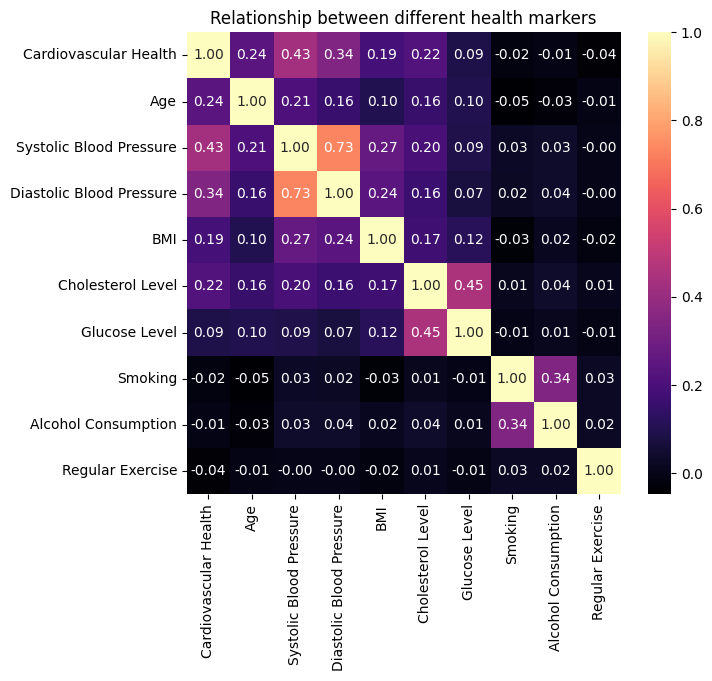

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def risk_factor_correlations():
  columns_list = ["cardio", "age", "ap_hi", "ap_lo", "bmi", "cholesterol", "gluc", "smoke", "alco", "active"]

  correlation_matrix = df[columns_list].corr()

  rename_labels = {
      "cardio": "Cardiovascular Health",
      "age": "Age",
      "ap_hi": "Systolic Blood Pressure",
      "ap_lo": "Diastolic Blood Pressure",
      "bmi": "BMI",
      "cholesterol": "Cholesterol Level",
      "gluc": "Glucose Level",
      "smoke": "Smoking",
      "alco": "Alcohol Consumption",
      "active": "Regular Exercise"
       }

  correlation_matrix = correlation_matrix.rename(index=rename_labels, columns=rename_labels)

  plt.figure(figsize=(7,6))
  # Creating the heatmap from the correlation matrix, setting the colour map, setting annotatons as floating point numbers,
  # no lines between squares and adding a colour bar
  sns.heatmap(correlation_matrix, cmap="magma", annot=True, fmt=".2f", linewidths=0, cbar=True)
  plt.title("Relationship between different health markers")
  plt.show()

risk_factor_correlations()

None of the variables showed a strong correlation with poor cardiovascular health in the heatmap, which aligns with the relatively low effect sizes observed in the Cohen's D calculations. The two blood pressure columns do show a moderately strong association between high blood pressure and poor cardiovascular health, something that mirrors the Cohen's D scores we collected previously as the blood pressure columns also had the highest magnitude of difference when split by cardiovascular health.

Because the Cohen's D score was high for these factors, but the correlation was only moderately strong, it suggests that on average blood pressure differs significantly between those with good and poor cardiovascular health. However, at the individual level, the relationship between blood pressure and cardiovascular health may be influenced by other factors. However, in our dataset there are no other factors showing a strong influence on cardiovascular health, so further research would be needed to determine what those factors were.

The highest association in he heatmap is, perhaps unsurprisingly, between the two blood pressure readings. This makes sense, as having a higher Systolic blood pressure tends to also come with having a high Diastolic blood pressure reading.

Other moderate associations can be seen between cholesterol and glucose levels, and between smoking and drinking habits. This suggests that among those in this dataset, those with higher cholesterol were also likely to have higher blood glucose levels, and vice versa, and that those who smoked were also more likely to drink a high amount of alcohol.

---
### Other Health Indicators

We can also use the columns in this dataset which aren't categorical to see what relationship where might be between different aspects of physical health.

Since we have columns containing the Systolic and Diastolic bloop pressure readings of each patient, we can calculate the pulse pressure (the difference between the two pressure readings over a cycle of heart beats). Pulse pressure is often used as an indicator of vascular health, and an elevated pulse pressure score often indicates arterial hardness which is associated with increased risk for cardiovascular conditions such as strokes and heart atttacks.

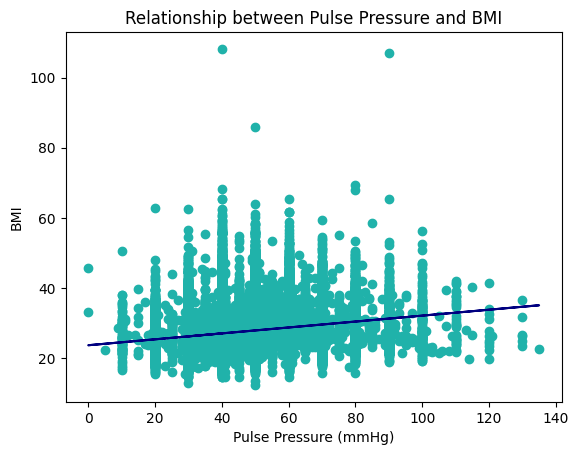

In [ ]:
from scipy.stats import linregress

def pulse_pressure_and_bmi():
  df["pulse_pressure"] = df["ap_hi"] - df["ap_lo"]
  plt.scatter(df["pulse_pressure"], df["bmi"], color="lightseagreen")
  plt.xlabel("Pulse Pressure (mmHg)")
  plt.ylabel("BMI")
  plt.title("Relationship between Pulse Pressure and BMI")

  regression = linregress(df["pulse_pressure"], df["bmi"])
  slope = regression.slope
  intercept = regression.intercept
  plt.plot(df["pulse_pressure"], slope*df["pulse_pressure"] + intercept, "navy")
  plt.show

pulse_pressure_and_bmi()


From this scatter graph it does seem like pulse pressure does broadly increase as BMI increases. We can also see that a considerable portion of the patients have what would be considered an elevated pulse pressure (over 40 mmHg) and that many also have a very high pulse pressure (over 60 mmHg).

### Demographics

### Age
To answer the second question I laid out, I will need to examine differences in the data between men and women, and between different age groups.

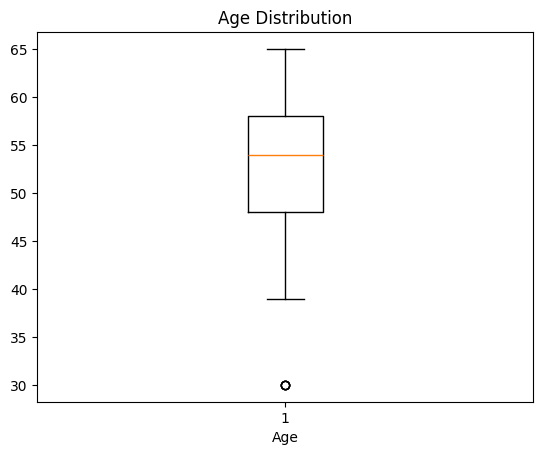


----------------------------------------


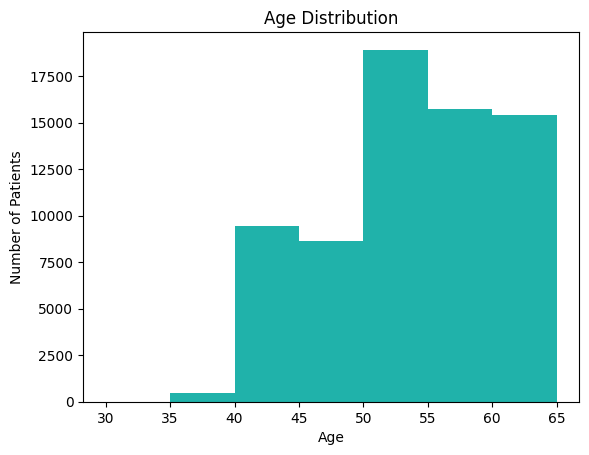

In [ ]:
def box_plot_age():
  plt.boxplot(df["age_years"])
  plt.xlabel("Age")
  plt.title("Age Distribution")
  plt.show()

box_plot_age()

print("\n"+"-"*40)

def histogram_age():
  plt.hist(df["age_years"], bins=7, color="lightseagreen")
  plt.xlabel("Age")
  plt.ylabel("Number of Patients")
  plt.title("Age Distribution")
  plt.show()

histogram_age()

The histogram and box plot show that on average patients in the dataset are towards the older age of the range, with the most numerous age groupe being those aged 50-55, followed by the age groups over 55. There are relatively few patients towards the younger end of the 30-65 scale, with those closer to 30 standing out as outliers among the rest of the patients.  

### Sex

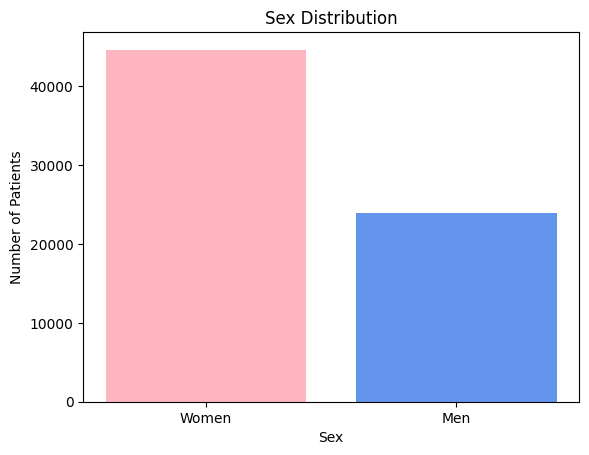

Percentage of women in the dataset: 65.14%
Percentage of men in the dataset: 34.86%


In [ ]:
def sex_barchart():
  count_sexes = df["sex"].value_counts().sort_index()
  plt.bar(["Women", "Men"], count_sexes, color=["lightpink", "cornflowerblue"])
  plt.xlabel("Sex")
  plt.ylabel("Number of Patients")
  plt.title("Sex Distribution")
  plt.show()

sex_barchart()

def sex_percentages():
  count_sexes = (df[df["sex"] == 1]["sex"]).count()
  percentage = count_sexes / len(df) * 100
  print(f"Percentage of women in the dataset: {round(percentage, 2)}%")
  print(f"Percentage of men in the dataset: {round(100-percentage, 2)}%")


sex_percentages()

The bar chart shows that there are considerably more women in the dataset than men, with nearly 2 female patients for every male patient.

This is significant because the prevelance of cardiovascular disease, as well as the impact of risk factors and the manner of presentation, are significantly different for men and women, as reported  [here in PubMed](https://pmc.ncbi.nlm.nih.gov/articles/PMC3018605/).

Notably cardiovascular diseases often present later for women than for men, even when the same risk factors are involved. Since the age range for this group of patients caps out at 65, and the sample selection for the dataset leans towards women, there was a risk it could be influencing how the health markers and risk factors were shown as correlating with cardiovascular disease risk.

Because of this I decided to rerun the risk factor heatmap using only the data relating to male patients to see if it was noticeably different.

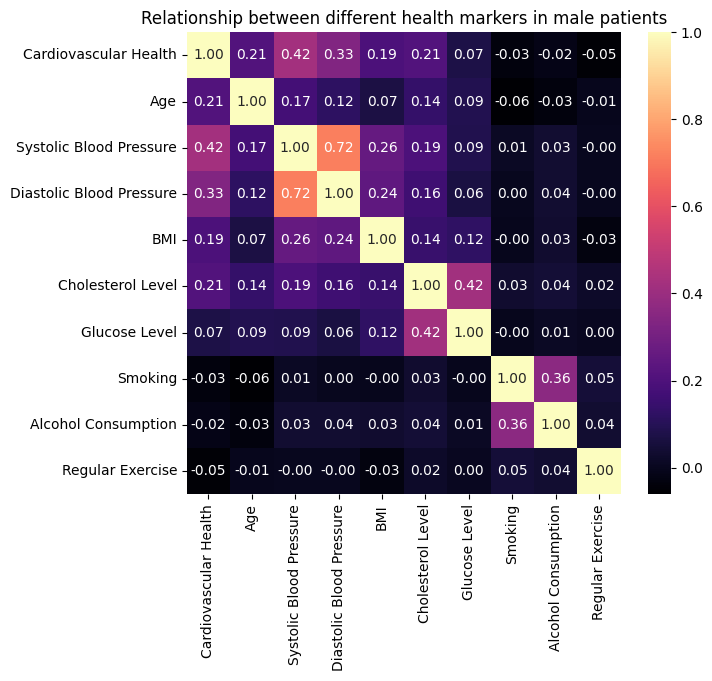

In [ ]:
def risk_factor_correlations_men():
  men_df =  df[df["sex"] == 2]

  columns_list = ["cardio", "age", "ap_hi", "ap_lo", "bmi", "cholesterol", "gluc", "smoke", "alco", "active"]

  correlation_matrix = men_df[columns_list].corr()

  rename_labels = {
      "cardio": "Cardiovascular Health",
      "age": "Age",
      "ap_hi": "Systolic Blood Pressure",
      "ap_lo": "Diastolic Blood Pressure",
      "bmi": "BMI",
      "cholesterol": "Cholesterol Level",
      "gluc": "Glucose Level",
      "smoke": "Smoking",
      "alco": "Alcohol Consumption",
      "active": "Regular Exercise"
  }

  correlation_matrix = correlation_matrix.rename(index=rename_labels, columns=rename_labels)

  plt.figure(figsize=(7,6))
  # Creating the heatmap from the correlation matrix, setting the colour map, setting annotatons as floating point numbers, no lines between square and adding a colour bar
  sns.heatmap(correlation_matrix, cmap="magma", annot=True, fmt=".2f", linewidths=0, cbar=True)
  plt.title("Relationship between different health markers in male patients")
  plt.show()

risk_factor_correlations_men()

This heatmap shows very little meaningful difference in comparison to the heatmap based on all the data, as a result it seems unlikely that the unbalanced gender representation in the dataset was affecting the results in this way.

In [ ]:
from google.colab import files
# Save file so it can be imported into Tableau
def save_file(df, filename):
  savefile = df.to_csv(filename + ".csv", index=False)
  files.download(filename + ".csv")

save_file(df, "medical_data_new")




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Interpret and Visualise


---



### Instructions

1. Load your saved dataset(s) into PowerBI.
2. Create a number of different visualisations that emphasise your findings.
3. For each visualisation, add a text box to explain what it shows.
4. Take screenshots of your work and add them in the text box.

I loaded my data into Tableau in order to create interactive visualisations that could filter the data within a dashboard.

In order to prepare the data, I changed the datatype of the categorical values in the dataset (those where variables like sex, cardiovascular health or smoking were representing by numbers) from numbers to a string data type, as this would make it easier for Tableau to recognise them as categorical and not numerical variables.

The finished dashboard can be found [here on Tableau Public](https://public.tableau.com/app/profile/taylor.logan/viz/MedicalDatasetDashboard_17432740797860/Dashboard1?publish=yes) and is also shown below in a screenshot. The charts in the dashboard can all be filtered based on sex, cardiovascular health, and behaviours (smoking, drinking and exercise) as these visualisations have been set to act as filters.

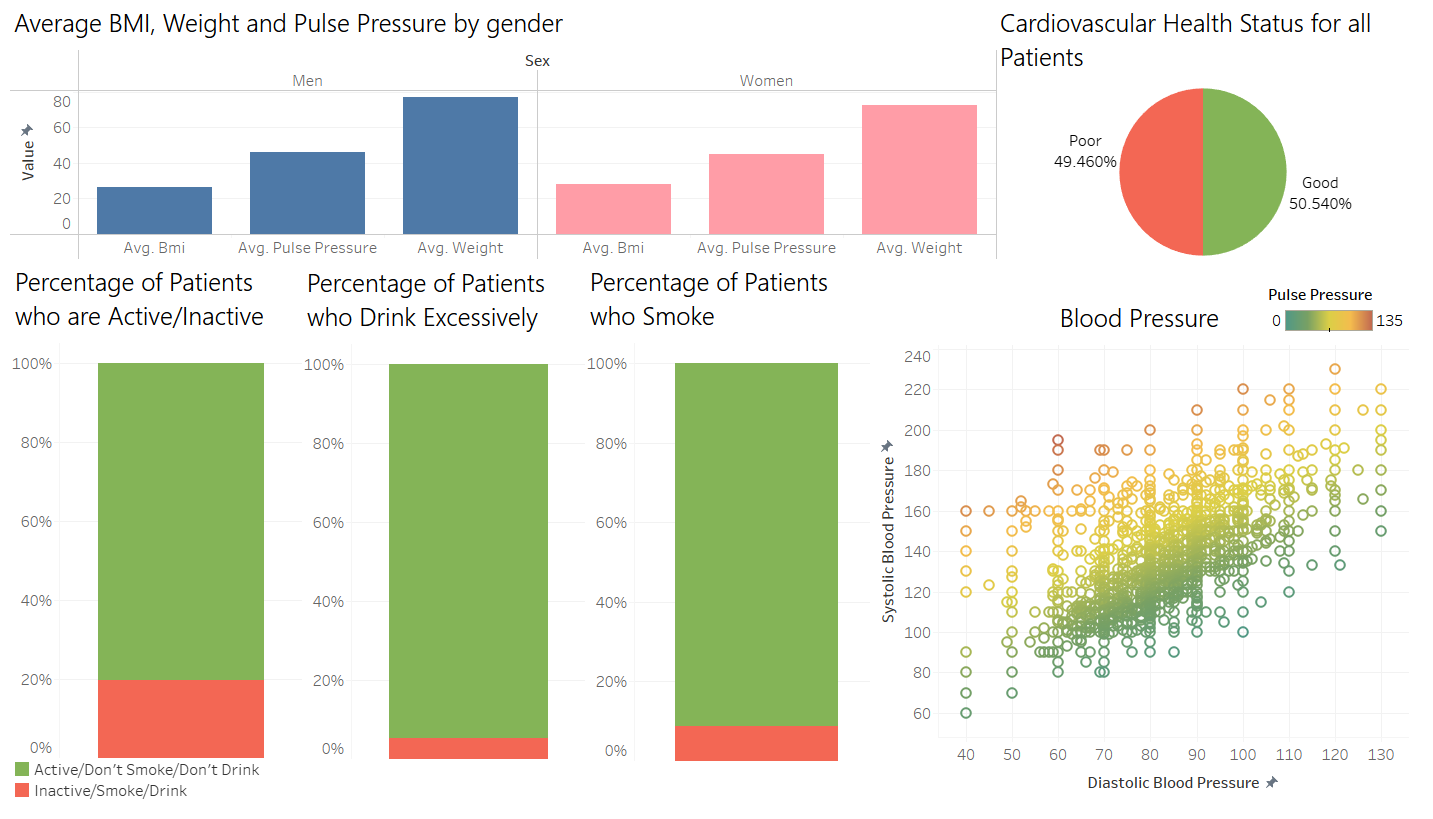

The first visual I created was a pie chart showing the proportion of the patients in our dataset who had poor or good cardiovascular health. This was to be used as a filter in the dashboard, and also to show the breakdown of cardiovascular health for filtered populations of patients when other filters were applied.

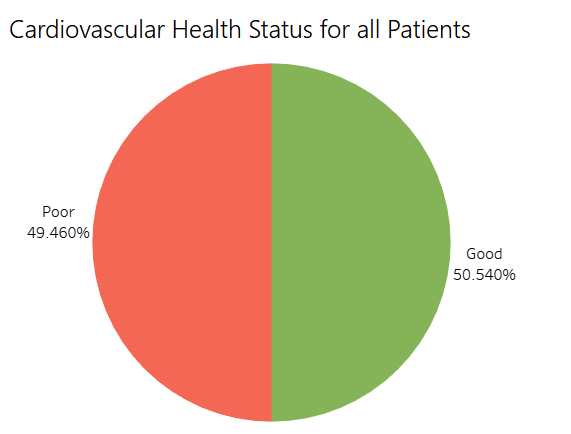

The second visualisation I created was a gendered breakdown of BMI, Pulse Pressure and weight. This was to help act as a filter to isolate data for men and women in the dashboard, and also to help act as an indicator of the average of these various health and body condition indicators.

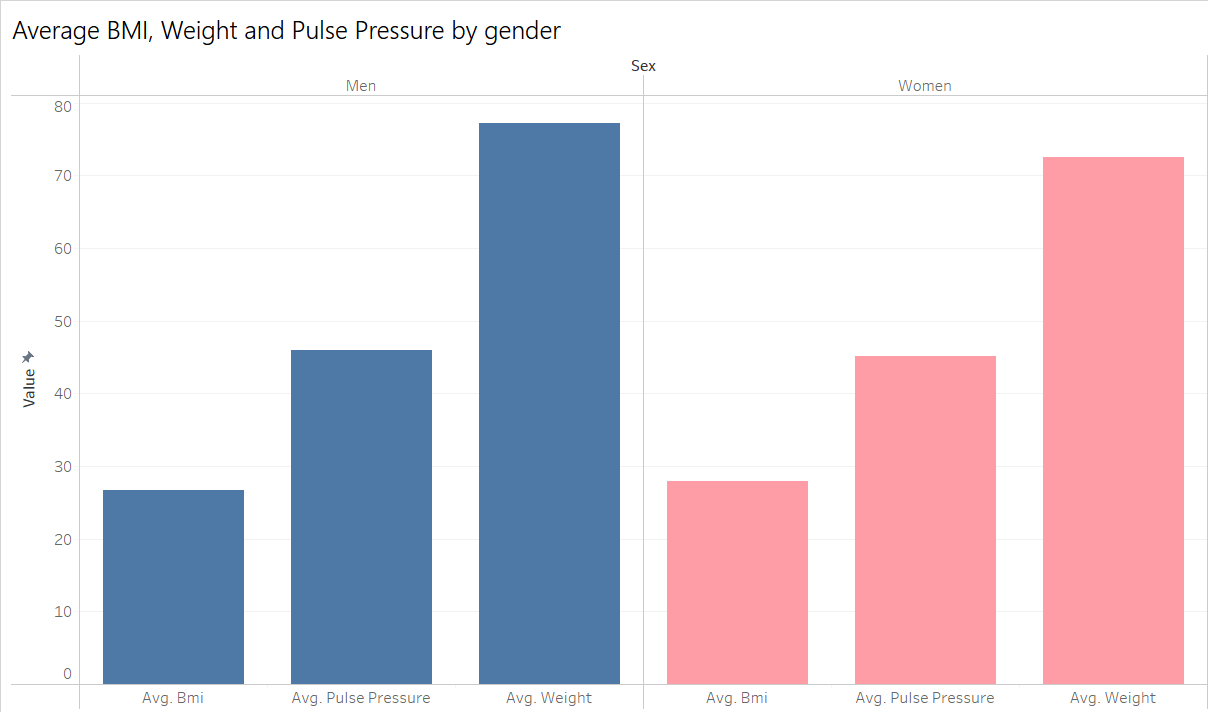

Next I created three stacked bar charts showing the percentage breakdowns of patients with the three behaviours measured in the dataset; physical activity, smoking, and excessive alcohol consumption. Once again these were set as filters, and viewers of the dashboard can select multiple combinations of behaviours to filter the rest of the data (for example to view the health data for those who both smoke and drink, of for those who smoke but are physically active etc.).

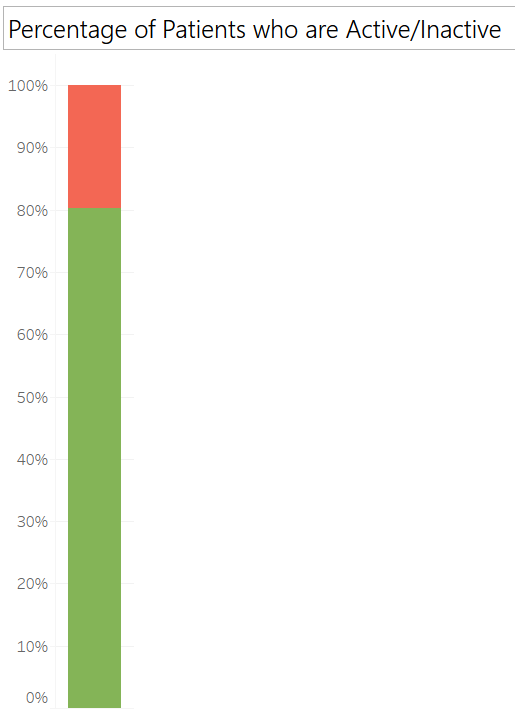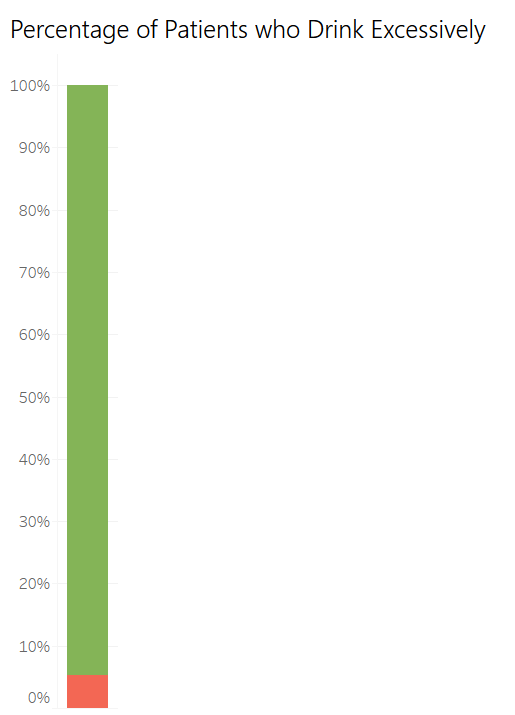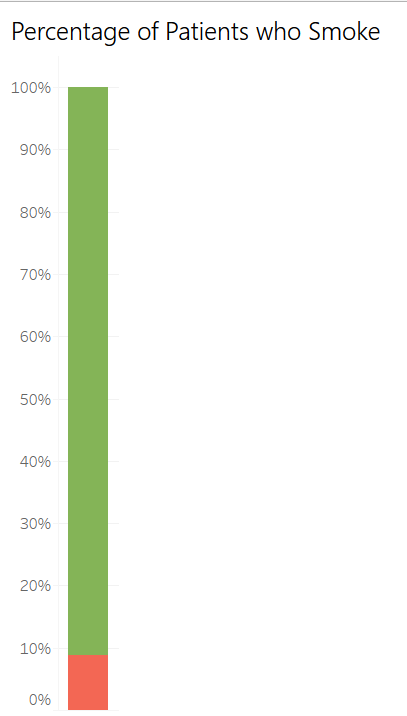

The final visualisation I added to my dashboard was a scatter plot of the two blood pressure readings, with a colour scale denoting pulse pressure (a measure derived from blood pressure readings which gives an indication of issues like artierial stiffening). This visualisation provides an insight into how the different blood pressure variables interact.

## Tell the Story



---



### Conclusions

After completing this analysis, we can start to draw some conclusions about what this data shows us about the cardiovascular health of the patients described in it, and the various factors that may be contributing to their health.

There were remarkably few strong correlations between lifestyle choices such as smoking or lack of physical activity, and poor cardiovascular health, or other measures of health such as blood pressure or BMI. The strongest data in the whole set, in terms of correlations and patterns that can be identified, came from the blood pressure readings, which did show a slight correlation and effect on cardiovascular health.

There were signs that the data may not have had an entirely balanced and proportional sample selection, including a heavy bias towards female patients, and most patients falling between 50 and 65, but without the inclusion of patients older than 65 who might be even more at risk of cardiovascular disease. This is particularily true for women, and an ideal dataset on this topic would likely be both balanced in terms of sex but also contain data from a wider range of ages.

If I were going to conduct further research, I would want to expand on some of the variables in this dataset which were categorical in order to explore the relation between certain health indicators and lifestyle behaviours on cardiovascular health. This might include collecting data on seperate cardiovascular conditions, to see if certain diseases or disorders are associated with different risk factors than orders, or collecting data on behaviours such as physical activity or smoking which provided more than a binary data point on which to base analysis.



## Evaluate the Process


---



### Instructions

Evaluate each of the steps in your project answering any of the following questions that are relevant:
1. What were you pleased with?
2. What did you find difficult?
3. What would you do differently?
4. What have you learnt?



### What Went Well
I am happy with how several steps in this project went. The data cleaning stage required a significant amount of attention paid to likely erroneous data, as well as research to find the correct limits to place on the data in order to prevent inaccurate data from interfering with the results without removing potentially valid data which could be important in forming an accurate picture of the data in the analysis stage.

In the analysis stage, I am proud that I was able to learn how to use a couple of new data analysis techniques, specifically Cohen's D for measuring effect size, and Seaborn heatmaps for plotting the correlation between several variables. It's always rewarding to gain additional skills, and in this project they helped me better understand the data and deal with the categorical fields that were central to this dataset.

Finally, I am happy with how interactive my Tableau dashboard turned out. The ability to filter on different fields makes it suited to dynamic analysis of the data.



### What Could Have Gone Better
There were a few hurdles I faced during this analysis. The first was when my initial attempts to examine the data using linear regression produced results that seemed different from what would be expected of that sort of analysis. This was because so much of my data was categorical. I sought advice and used a correlation matrix to determine the relationships between the variables in the dataset instead, and displayed these using a heatmap.

Another hurdle was encountered when I created a visualisation using Pulse Pressure, and realised that some of the data in that column was in the form of negative numbers. This shouldn't be possible for Pulse Pressure as the Systolic Blood Pressure reading should always be higher than that of the Diastolic Blood Pressure reading. As a result I had to go back to excel and remove all of the erroneous blood pressure readings I had missed during the initial cleaning. In future I will consider not only if data makes sense within the context of the column it is in, but if there are any relationships to other columns that would highlight erroneous data.

